# Conversion prediction | ML Zoomcamp mid-term project

## Library import and dataload

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df_train_part = pd.read_csv('data/customer_conversion_traing_dataset .csv')
df_test_part = pd.read_csv('data/customer_conversion_testing_dataset.csv')

df = pd.concat([df_train_part,df_test_part])
df.reset_index(drop=True, inplace=True)

I could have used just training dataset for the whole exploration phase, but opted to combined them to adhere to how it was typically done thrughout the course.

## Data exploration

Let's see how the data looks like:

In [3]:
df.head().T

,0,1,2,3,4
LeadID,1,2,3,4,5
Age,60,27,21,37,35
Gender,Female,Female,Female,Female,Male
Location,Faisalabad,Islamabad,Rawalpindi,Faisalabad,Karachi
LeadSource,Referral,Referral,Referral,Email,Referral
TimeSpent (minutes),30,28,45,45,31
PagesViewed,13,4,10,15,11
LeadStatus,Warm,Hot,Warm,Warm,Cold
EmailSent,1,7,9,5,2
DeviceType,Desktop,Desktop,Tablet,Desktop,Tablet


OK... it seems like we have a mix of numerical and categorical values. A `Lead ID` that is really just an index (we need to get rid of it before the training) and our target column `Conversion (Target)`. Let's check for how consistent is the data by checking the nulls:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126145 entries, 0 to 126144
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LeadID                 126145 non-null  int64  
 1   Age                    126145 non-null  int64  
 2   Gender                 126145 non-null  object 
 3   Location               126145 non-null  object 
 4   LeadSource             126145 non-null  object 
 5   TimeSpent (minutes)    126145 non-null  int64  
 6   PagesViewed            126145 non-null  int64  
 7   LeadStatus             126145 non-null  object 
 8   EmailSent              126145 non-null  int64  
 9   DeviceType             126145 non-null  object 
 10  ReferralSource         126145 non-null  object 
 11  FormSubmissions        126145 non-null  int64  
 12  Downloads              126145 non-null  int64  
 13  CTR_ProductPage        126145 non-null  float64
 14  ResponseTime (hours)   126145 non-nu

Just be sure ;)

In [5]:
df.isnull().sum()

LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64

Cool, so we don't have missing values, one less thing for us to worry about. It doesn't surprise me as it was a dataset with usability 10.0 on Kaggle. 

Let's start breaking down what is in the categorical and numerical value.

In [6]:
categorical = ['Gender','Location','LeadSource','LeadStatus','DeviceType','ReferralSource','PaymentHistory']
numerical = ['Age', 'TimeSpent (minutes)','PagesViewed','EmailSent','FormSubmissions',
             'Downloads','CTR_ProductPage','ResponseTime (hours)','FollowUpEmails','SocialMediaEngagement']      

In [7]:
df[numerical].describe().round(2)

,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement
count,126145.00,126145.00,126145.00,126145.00,126145.00,126145.00,126145.00,126145.00,126145.00,126145.00
mean,39.99,32.51,8.50,4.99,2.50,1.50,0.45,12.52,4.99,110.01
std,11.85,16.16,4.03,3.17,1.71,1.12,0.21,6.93,3.16,52.24
min,20.00,5.00,2.00,0.00,0.00,0.00,0.10,1.00,0.00,20.00
25%,30.00,18.00,5.00,2.00,1.00,0.00,0.30,7.00,2.00,65.00
50%,40.00,33.00,8.00,5.00,3.00,2.00,0.40,13.00,5.00,110.00
75%,50.00,47.00,12.00,8.00,4.00,2.00,0.60,19.00,8.00,155.00
max,60.00,60.00,15.00,10.00,5.00,3.00,0.80,24.00,10.00,200.00


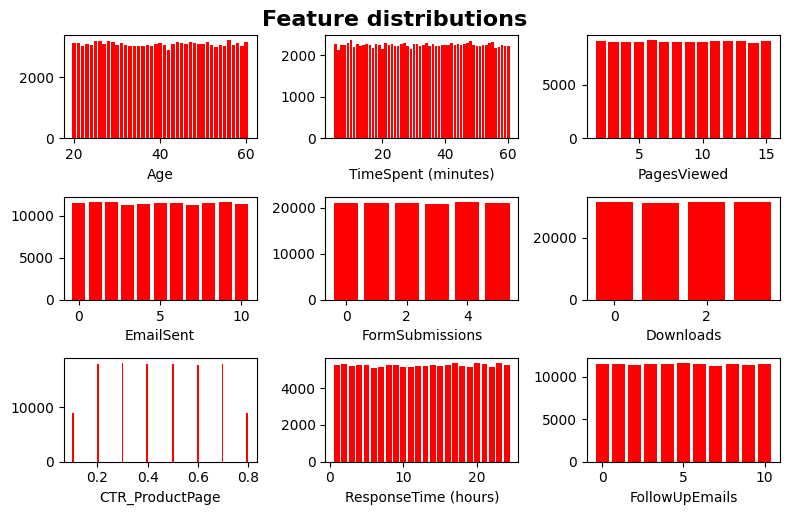

In [8]:
fig, axs = plt.subplots(3, 3, figsize=(8,5))
for col, ax in zip(df[numerical].columns, axs.ravel()):
    if df[numerical][col].dtype == float:
        ax.hist(df[numerical][col], bins=100, color='red')
    else: #int
        vc = df[numerical][col].value_counts()
        ax.bar(vc.index, vc, color='red')
    ax.set_xlabel(col)
plt.tight_layout()
plt.suptitle('Feature distributions', y=1.02, fontsize=16, fontweight = "bold")
plt.show()

All seems pretty well distributed and reasonable within the numerical realm, let´s look at the categorical ones.

In [9]:
df[categorical].nunique()

Gender             2
Location          10
LeadSource         4
LeadStatus         3
DeviceType         3
ReferralSource     5
PaymentHistory     2
dtype: int64

Nothing major, 2 genders, 10 locations several lead sources and status etc. Let´s look at the target value

In [10]:
global_mean = df['Conversion (Target)'].mean()
global_mean

0.016330413413135677

Ok, very low value of conversion rate (1.6%) which makes for a website but we are under a very biased sample - need to take that into account while evaluating the model.

Let´s keep digging in the relationships between the columns, starting with the categorical.

In [11]:
from IPython.display import display

In [12]:
for col in categorical:
    df_group = df.groupby(by=col)['Conversion (Target)'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
Gender,,,
Female,0.015821,-0.000509,0.96882
Male,0.016841,0.000510,1.03125


,mean,diff,risk
Location,,,
Faisalabad,0.000000,-0.016330,0.000000
Gujranwala,0.000000,-0.016330,0.000000
Islamabad,0.053922,0.037591,3.301911
Karachi,0.054658,0.038328,3.347024
Lahore,0.054162,0.037832,3.316640
Multan,0.000000,-0.016330,0.000000
Peshawar,0.000000,-0.016330,0.000000
Quetta,0.000000,-0.016330,0.000000
Rawalpindi,0.000000,-0.016330,0.000000


,mean,diff,risk
LeadSource,,,
Email,0.017188,0.000858,1.052530
Organic,0.017109,0.000778,1.047648
Referral,0.015384,-0.000947,0.942023
Social Media,0.015630,-0.000700,0.957106


,mean,diff,risk
LeadStatus,,,
Cold,0.010220,-0.006110,0.625832
Hot,0.028961,0.012630,1.773421
Warm,0.009806,-0.006524,0.600490


,mean,diff,risk
DeviceType,,,
Desktop,0.017043,0.000712,1.043620
Mobile,0.015305,-0.001025,0.937204
Tablet,0.016659,0.000329,1.020127


,mean,diff,risk
ReferralSource,,,
Direct,0.015612,-0.000718,0.956008
Facebook,0.016123,-0.000207,0.987317
Google,0.016746,0.000415,1.025421
ReferralSite,0.016472,0.000142,1.008681
Twitter,0.016701,0.000371,1.022691


,mean,diff,risk
PaymentHistory,,,
Good,0.015808,-0.000523,0.968004
No Payment,0.016854,0.000524,1.032058


In [13]:
from sklearn.metrics import mutual_info_score

In [14]:
def calculate_mi(series):
    return mutual_info_score(series, df['Conversion (Target)'])

df_mi = df[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi)

,MI
Location,0.019922
LeadStatus,0.002309
LeadSource,0.000021
DeviceType,0.000018
PaymentHistory,0.000009
Gender,0.000008
ReferralSource,0.000006


All categorical variables seem to have weak relationships with the target value with exception perhaps for locations in big cities and hot leads (which again makes empirical sense).

Let's check now the numerical values.

In [15]:
df[numerical + ['Conversion (Target)']].corr()

,Age,TimeSpent (minutes),PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,Conversion (Target)
Age,1.000000,-0.000617,0.004167,-0.000619,0.002805,0.005038,-0.000983,-0.003739,-0.000411,0.001539,-0.034354
TimeSpent (minutes),-0.000617,1.000000,-0.001712,-0.001126,-0.003405,-0.002465,-0.000258,-0.002745,-0.003585,-0.001822,0.040663
PagesViewed,0.004167,-0.001712,1.000000,-0.002140,-0.000345,-0.001217,-0.000238,-0.000623,-0.001931,0.001326,0.161177
EmailSent,-0.000619,-0.001126,-0.002140,1.000000,0.001707,-0.004420,0.005264,-0.002752,0.003012,-0.005056,0.065399
FormSubmissions,0.002805,-0.003405,-0.000345,0.001707,1.000000,0.004597,0.001645,0.003340,-0.005037,0.001017,0.001451
Downloads,0.005038,-0.002465,-0.001217,-0.004420,0.004597,1.000000,-0.002233,-0.001267,-0.000504,0.000931,-0.000201
CTR_ProductPage,-0.000983,-0.000258,-0.000238,0.005264,0.001645,-0.002233,1.000000,-0.001432,-0.001162,-0.003040,0.001883
ResponseTime (hours),-0.003739,-0.002745,-0.000623,-0.002752,0.003340,-0.001267,-0.001432,1.000000,0.000498,-0.000777,-0.002958
FollowUpEmails,-0.000411,-0.003585,-0.001931,0.003012,-0.005037,-0.000504,-0.001162,0.000498,1.000000,-0.000265,0.043651
SocialMediaEngagement,0.001539,-0.001822,0.001326,-0.005056,0.001017,0.000931,-0.003040,-0.000777,-0.000265,1.000000,0.001734


Text(0.5, 1.0, 'Dataset correlation matrix')

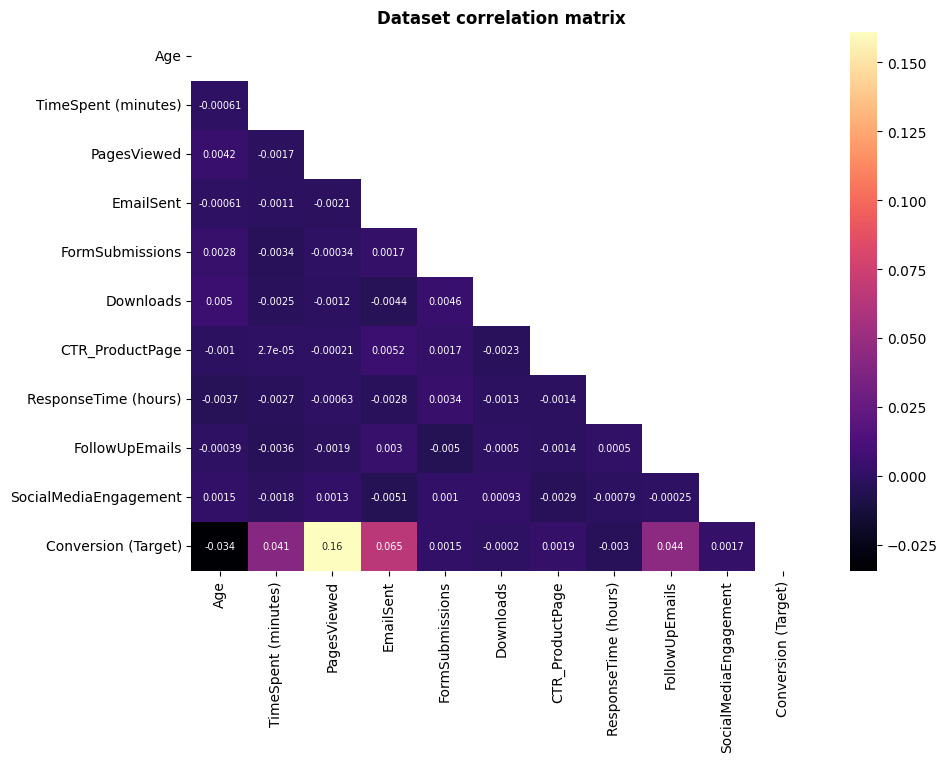

In [16]:
corr = df[numerical + ['Conversion (Target)']].corr(method = "spearman")
plt.figure(figsize = (10, 7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap = "magma", annot = True, annot_kws = {'size': 7})
plt.title("Dataset correlation matrix", fontsize = 12, fontweight = "bold")

Ok, so despite correlation being weak across the broad, we can see that some interactions might have some predictive power, namely `Pageviews`, `EmailsSent`, etc.

### Conclusion

- Dataset is quite good in terms of quality for an ML exercise (no missing values, well behaved data, etc.).
- Target variable distribution is quite imbalanced (only 1.6% conversion rate).
- With the exception of `Location`, categorical values don't seem to contribute much to the target variable.
- `PagesViewed`, `Email Sent`, `TimeSpent (minutes)` and `FollowUpEmails` seem to yield some predictive power vs. other variables.

## Model Selection

### Dataset preparation for training

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)
y_train = df_train['Conversion (Target)']
y_val = df_val['Conversion (Target)']
y_test = df_test['Conversion (Target)']
del df_train['Conversion (Target)']
del df_val['Conversion (Target)']
del df_test['Conversion (Target)']

train_dict = df_train.to_dict(orient='records')
val_dict = df_val.to_dict(orient='records')
test_dict = df_test.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)
X_val = dv.transform(val_dict)

### Logistic regression

Let´s start by training a simple Logistic Regression model

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
conv = y_pred > 0.5
(y_val == conv).mean()

0.9837884973641444

98,4% accuracy at first shot - oh yeah! But let´s not forget that 98.4% of the users don't convert, so having a model that would simply call every user as not converting would do an equally good job. Let´s test things with ROC AUC.

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

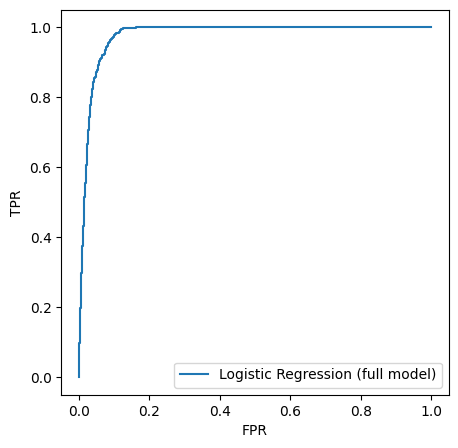

In [20]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr,label='Logistic Regression (full model)')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [21]:
roc_auc_score(y_val, y_pred)

0.9762169030291621

Ok... not a bad result, let´s check how each variable weights for the final decision:

In [22]:
features_coefs = dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))
sorted_data = dict(sorted(features_coefs.items(), key=lambda item: abs(item[1]), reverse=True))
sorted_data

{'Location=Lahore': 1.898,
 'Location=Karachi': 1.878,
 'Location=Islamabad': 1.827,
 'Gender=Female': -1.389,
 'PaymentHistory=Good': -1.363,
 'LeadStatus=Warm': -1.29,
 'PaymentHistory=No Payment': -1.286,
 'Gender=Male': -1.26,
 'LeadStatus=Cold': -1.236,
 'Location=Gujranwala': -1.214,
 'Location=Faisalabad': -1.195,
 'Location=Peshawar': -1.192,
 'Location=Sialkot': -1.176,
 'Location=Quetta': -1.173,
 'Location=Rawalpindi': -1.166,
 'Location=Multan': -1.135,
 'DeviceType=Mobile': -0.928,
 'DeviceType=Desktop': -0.877,
 'DeviceType=Tablet': -0.844,
 'LeadSource=Referral': -0.733,
 'CTR_ProductPage': -0.703,
 'LeadSource=Social Media': -0.656,
 'LeadSource=Email': -0.64,
 'LeadSource=Organic': -0.62,
 'ReferralSource=Facebook': -0.566,
 'ReferralSource=Twitter': -0.557,
 'ReferralSource=ReferralSite': -0.545,
 'ReferralSource=Direct': -0.53,
 'ReferralSource=Google': -0.451,
 'PagesViewed': 0.439,
 'EmailSent': 0.255,
 'LeadStatus=Hot': -0.123,
 'FollowUpEmails': 0.088,
 'Age': -0

Not, what I was expecting...location still seems to be decisive (as suggested during exploration), but then gender and other variables appear with the `PagesViewed` not even ranking in top10. Let´s see if reducing the number of variables helps us somehow.

In [23]:
subset = ['Location', 'PagesViewed', 'EmailSent','LeadStatus']
train_dict_small = df_train[subset].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(train_dict_small)

X_small_train = dv_small.transform(train_dict_small)

model_small = LogisticRegression(solver='liblinear', random_state=1)
model_small.fit(X_small_train, y_train)

val_dict_small = df_val[subset].to_dict(orient='records')
X_small_val = dv_small.transform(val_dict_small)
y_pred_small = model_small.predict_proba(X_small_val)[:, 1]

In [24]:
roc_auc_score(y_val, y_pred_small)

0.9773859682152225

It improved a bit, but not dramatically - let´s try other models. I'll aim to first see which type of models would work best for this data and later care about parameter optimization.

### Trees

#### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [26]:
y_pred_val_dt = dt.predict_proba(X_val)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_val, y_pred_val_dt)
roc_auc_score(y_val, y_pred_val_dt)

0.9936020942344648

Already better than logistics regression. Let's continue trying with ensembles and xgboost.

#### RandomForest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state=1)

In [28]:
y_pred_val_rf = rf.predict_proba(X_val)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_val, y_pred_val_rf)
roc_auc_score(y_val, y_pred_val_rf)

0.9992477407878678

#### xGBoost

In [29]:
import xgboost as xgb
features = dv.get_feature_names_out().tolist() 
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [30]:
y_pred_xg = xgb_model.predict(dval)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_val, y_pred_xg)
roc_auc_score(y_val, y_pred_xg)

1.0

Ok, that's a great score... let's see if it scales.

In [31]:
y_train_full = df_train_full['Conversion (Target)']
del df_train_full['Conversion (Target)']
train_full_dict = df_train_full.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_full_dict)
X_train_full = dv.transform(train_full_dict)
X_test = dv.transform(test_dict)

dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=features)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=features)

model_full = xgb.train(xgb_params, dtrain_full, num_boost_round=100)
y_pred_test_xg = model_full.predict(dtest)
roc_auc_score(y_test, y_pred_test_xg)

1.0

Seems like XGBoost continues to scale well on unseen data.

### Conclusion

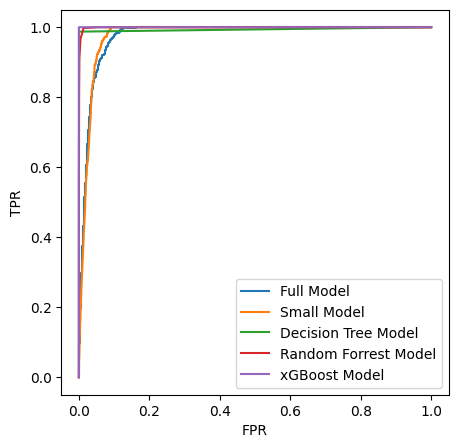

In [32]:
fpr_small, tpr_small, thresholds_small = roc_curve(y_val, y_pred_small)
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr,label='Full Model')
plt.plot(fpr_small, tpr_small,label='Small Model')
plt.plot(fpr_dt, tpr_dt,label='Decision Tree Model')
plt.plot(fpr_rf, tpr_rf,label='Random Forrest Model')
plt.plot(fpr_xg, tpr_xg,label='xGBoost Model')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

It's nice to see all the models side by side and how the trees really help us bring it closer to the "perfect model". I am bit skeptical about these results so I will evaluate them on other metrics as well just to double-check. Bear with me and some visualization code bellow.

In [33]:
def make_confusion_matrices(cfs,  # List of confusion matrices to be passed in
                          figsize=None,
                          titles=None):  # List of titles for each confusion matrix

    fig, axs = plt.subplots(1, len(cfs), figsize=figsize)
    if not isinstance(axs, np.ndarray):
        axs = [axs]

    axs[0].set_ylabel('True label')
    
    for i, cf in enumerate(cfs):
        # CODE TO GENERATE TEXT INSIDE EACH SQUARE
        blanks = ['' for _ in range(cf.size)]


        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten() / np.sum(cf)]
        box_labels = [
            f"{v1}{v2}".strip() for v1, v2 in zip(group_counts, group_percentages)
        ]
        box_labels = np.asarray(box_labels).reshape(cf.shape[0], cf.shape[1])

        # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
        accuracy = np.trace(cf) / float(np.sum(cf))
        if len(cf) == 2:
            precision = cf[1, 1] / sum(cf[:, 1])
            recall = cf[1, 1] / sum(cf[1, :])
            f1_score = 2 * precision * recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy, precision, recall, f1_score)


        # MAKE THE HEATMAP VISUALIZATION
        axs[i].set_title(titles[i] if titles else f'Confusion Matrix {i+1}')
        sns.heatmap(
            cf, annot=box_labels, fmt="", cmap='Blues', cbar=False, xticklabels=True, yticklabels=True, ax=axs[i]
        ) 
        axs[i].set_xlabel('Predicted label' + stats_text)

    axs[0].set_ylabel('True label')
    plt.tight_layout()
    plt.show()

In [34]:
from sklearn.metrics import confusion_matrix
cm_full = confusion_matrix(y_val, y_pred > 0.5)
cm_small = confusion_matrix(y_val, y_pred_small > 0.5)
cm_dt = confusion_matrix(y_val, y_pred_val_dt > 0.5)
cm_rf = confusion_matrix(y_val, y_pred_val_rf  > 0.5)
cm_xg = confusion_matrix(y_val, y_pred_xg > 0.5)

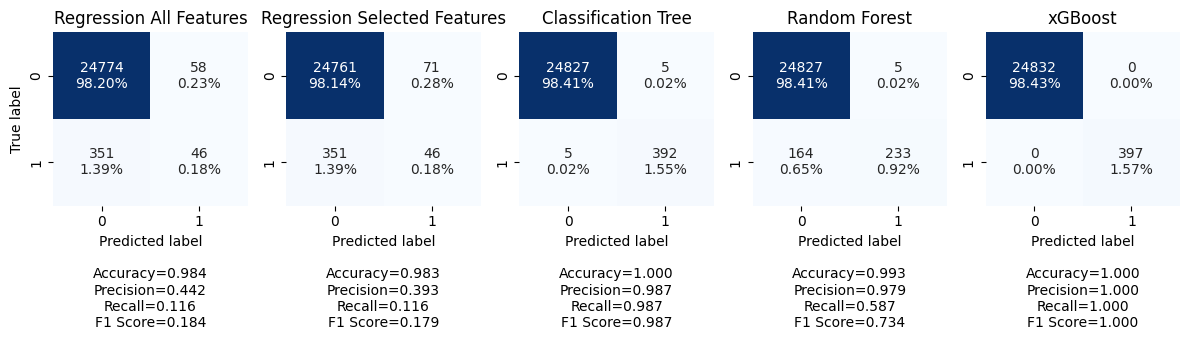

In [35]:
make_confusion_matrices([cm_full, cm_small, cm_dt, cm_rf, cm_xg], 
                        titles=['Regression All Features', 'Regression Selected Features', 
                                'Classification Tree', 
                                'Random Forest', 'xGBoost'], figsize=(12,3.5))

Classification tree and xGBoost seem to score really well, so next I'll try to squeeze some additional performance out of the Classification tree through parameter optimization. If so, I might opt for that as the final model as it would be simples to explain to stakeholders. If not, I will do some experiments with xGBoost to see if I can make it converge quicker.

## Parameter tuning

### Classification tree

In [36]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth,random_state=1)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.796
   2 -> 0.881
   3 -> 0.937
   4 -> 0.979
   5 -> 0.989
   6 -> 0.995
  10 -> 0.996
  15 -> 0.994
  20 -> 0.994
None -> 0.994


Depths between 6 and 10 seem to be the best. Let's now optimize for `min_sample_leaf`

In [37]:
scores = []

for depth in [6, 7, 8, 9, 10]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s,random_state=1)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

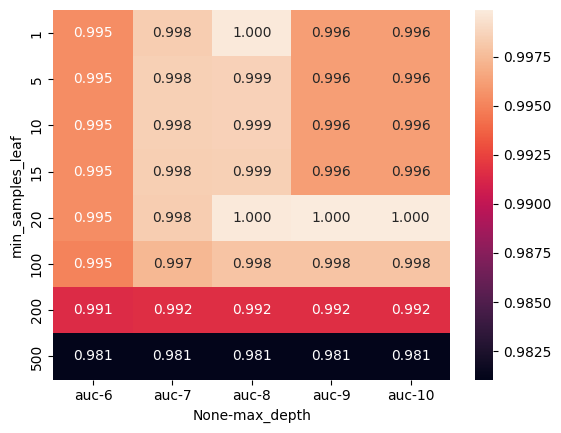

In [38]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

`max_depth` of 8 and `min_samples_leaf` of 20 seem to yield a good result, so let's look at how a tree like that looks like.

In [39]:
dt_opt = DecisionTreeClassifier(max_depth=9, min_samples_leaf=20,random_state=1)
dt_opt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=20, random_state=1)

In [40]:
from sklearn.tree import export_text
print(export_text(dt_opt, feature_names=list(dv.get_feature_names_out())))

|--- PagesViewed <= 12.50
|   |--- PagesViewed <= 10.50
|   |   |--- class: 0
|   |--- PagesViewed >  10.50
|   |   |--- LeadStatus=Hot <= 0.50
|   |   |   |--- class: 0
|   |   |--- LeadStatus=Hot >  0.50
|   |   |   |--- Age <= 40.50
|   |   |   |   |--- TimeSpent (minutes) <= 30.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TimeSpent (minutes) >  30.50
|   |   |   |   |   |--- Location=Lahore <= 0.50
|   |   |   |   |   |   |--- Location=Karachi <= 0.50
|   |   |   |   |   |   |   |--- Location=Islamabad <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Location=Islamabad >  0.50
|   |   |   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age >  24.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Location=Karachi >  0.50
|   |   |   |   |   |   |   |--- Age <= 24.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |  

This is great, not only we can generate a very good predictive model, but the relationships and ratios that this tree uncover can help our marketing teams to really optimize the experience on the website for different segment of customers. However let's see how this model compares with xGBoost with the confusion matrices.

In [41]:
y_pred_val_dt_opt = dt_opt.predict_proba(X_val)[:, 1]
cm_dt_opt = confusion_matrix(y_val, y_pred_val_dt_opt > 0.5)

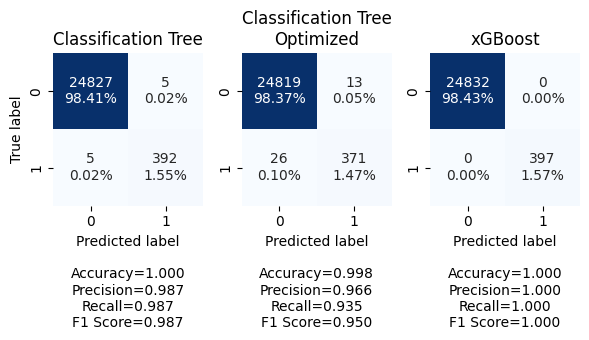

In [42]:
make_confusion_matrices([cm_dt, cm_dt_opt, cm_xg], 
                        titles=['Classification Tree', 'Classification Tree\nOptimized', 'xGBoost'], figsize=(6,3.5))

In [43]:
roc_auc_score(y_val, y_pred_val_dt)

0.9936020942344648

Despite a very good ROC AUC score, the tree model still missclassifies some users in the sample and its confusion matrix seems worse than the default tree (!). Not surprising since we've been optimizing for ROC AUC - good that we are also checking the confusion matrices. So let's go back to xGBoost and see if we can make it converge faster.

### xGBoost

Let's start with the default params and see how it converges.

In [44]:
features = dv.get_feature_names_out().tolist() 
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

In [45]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=20,
                  verbose_eval=1,
                  evals=watchlist)

In [46]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [47]:
df_score = parse_xgb_output(output)

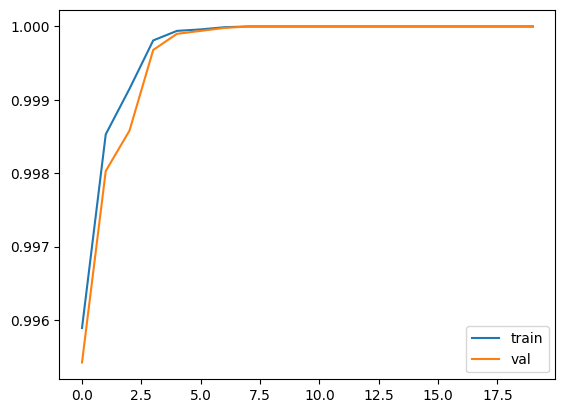

In [48]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

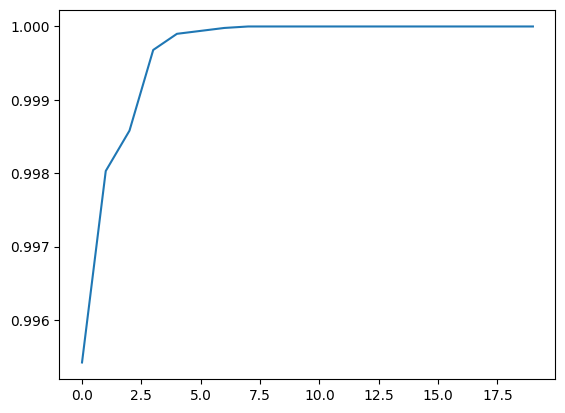

In [49]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')

We probably don't need more than 10 rounds. Let's now look at the parameters.

In [50]:
eta_scores = {}
max_depth_scores = {}
min_child_weight_scores = {}
df_scores = []

In [51]:
%%capture output

etas = [0.01,0.1,0.3,0.5,0.9]

for eta in etas:
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
    
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=10,
                      verbose_eval=1,evals=watchlist)

In [52]:
rows_per_split = 10
df_scores = [parse_xgb_output(output)[i * rows_per_split:(i + 1) * rows_per_split] for i in range(5)]

# Zip etas and df_scores into a dictionary using tuples (eta, df) as keys
eta_scores = {eta: df for eta, df in zip(etas, df_scores)}

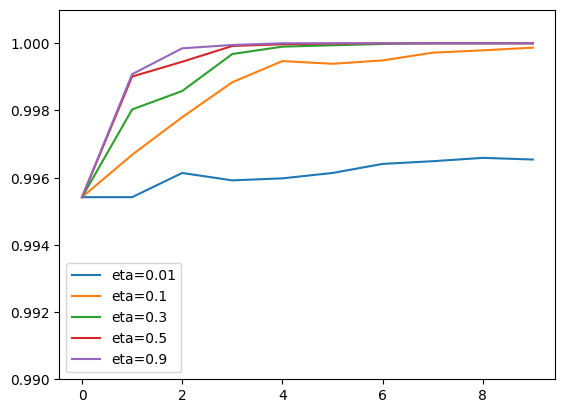

In [53]:
for eta, df_score in eta_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=f"eta={eta}")

plt.ylim(0.99, 1.001)
plt.legend()

Higher ETA seem to contribute to a faster convergence towards top AUC, but at default after 5 rounds it doesn't really matter.

In [54]:
%%capture output

max_depths = [3,4,6,9,10]

for max_depth in max_depths:
    xgb_params = {
        'eta': 0.3, 
        'max_depth': max_depth,
        'min_child_weight': 1,
    
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=10,
                      verbose_eval=1,evals=watchlist)

In [55]:
rows_per_split = 10
df_scores = [parse_xgb_output(output)[i * rows_per_split:(i + 1) * rows_per_split] for i in range(5)]

# Zip etas and df_scores into a dictionary using tuples (eta, df) as keys
max_depth_scores = {max_depth: df for max_depth, df in zip(max_depths, df_scores)}

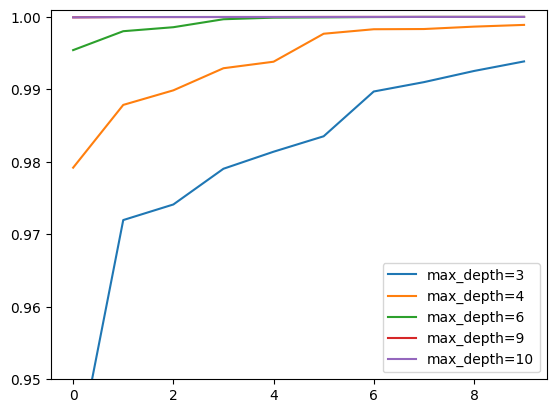

In [56]:
for max_depth, df_score in max_depth_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=f"max_depth={max_depth}")

plt.ylim(0.95, 1.001)
plt.legend()

As in eta higher `max_depth` seems to contribute to a faster convergence towards top AUC, but at default after 5 rounds it doesn't really matter.

In [57]:
%%capture output

min_child_weights = [1,5,10,20,30]

for min_child_weight in min_child_weights:
    xgb_params = {
        'eta': 0.3, 
        'max_depth': 6,
        'min_child_weight': min_child_weight,
    
        'objective': 'binary:logistic',
        'eval_metric': 'auc',

        'nthread': 8,
        'seed': 1,
        'verbosity': 1,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=10,
                      verbose_eval=1,evals=watchlist)

In [58]:
rows_per_split = 10
df_scores = [parse_xgb_output(output)[i * rows_per_split:(i + 1) * rows_per_split] for i in range(5)]

# Zip etas and df_scores into a dictionary using tuples (eta, df) as keys
min_child_weight_scores = {min_child_weight: df for min_child_weight, df in zip(min_child_weights, df_scores)}

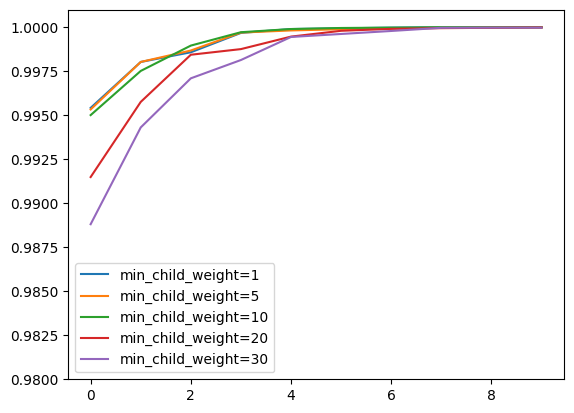

In [59]:
for min_child_weight, df_score in min_child_weight_scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=f"min_child_weight={min_child_weight}")

plt.ylim(0.98, 1.001)
plt.legend()

Finally, min child weight of 10 seems to also converge after 5 rounds.

### Optimization conclusion:
`eta`: 0.9, `max_depth`:10 and `min_child_weight`:10 seem to be an optimal configuration for up to 5 rounds.

In [60]:
xgb_params_opt = {
    'eta': 0.9, 
    'max_depth': 10,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

xgb_opt_model = xgb.train(xgb_params_opt, dtrain, num_boost_round=5)

Let's see if the confusion matrix still looks good for this model...

In [61]:
y_pred_val_xgb_opt = xgb_opt_model.predict(dval)
cm_xg_opt = confusion_matrix(y_val, y_pred_val_xgb_opt > 0.5)

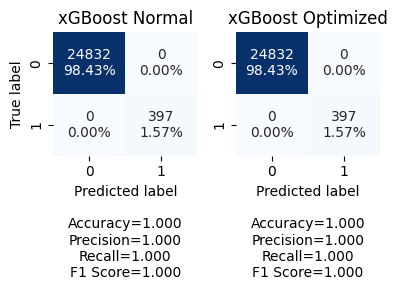

In [62]:
make_confusion_matrices([cm_xg, cm_xg_opt], 
                        titles=['xGBoost Normal', 'xGBoost Optimized'], figsize=(4,3))

In [63]:
y_pred_test_xgb_opt = xgb_opt_model.predict(dtest)

In [64]:
roc_auc_score(y_test, y_pred_test_xgb_opt)

1.0

and let's see if with test data the same results hold true:

In [65]:
cm_xg_test = confusion_matrix(y_test, y_pred_test_xgb_opt > 0.5)

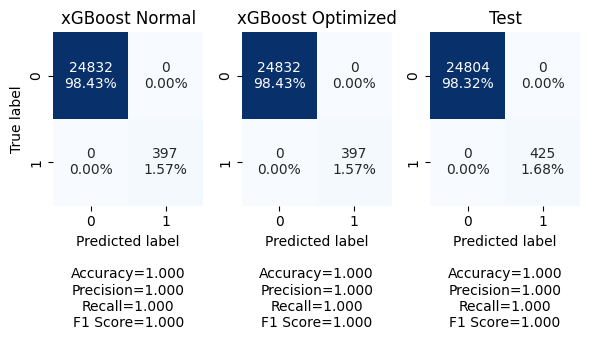

In [66]:
make_confusion_matrices([cm_xg, cm_xg_opt, cm_xg_test], 
                        titles=['xGBoost Normal', 'xGBoost Optimized', 'Test'], figsize=(6,3.5))